In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile ('/content/drive/MyDrive/archive.zip', 'r') as zipObj:
  zipObj.extractall('drive/MyDrive/content/datasets')


In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from keras import regularizers
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_dir = "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Test"
train_dir = "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train"
val_dir = "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Validation"

In [ ]:
batch_size = 32
target_size = (180, 180)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 976 images belonging to 3 classes.
Found 476 images belonging to 3 classes.
Found 682 images belonging to 3 classes.


In [ ]:
def view_images(target_dir, target_class, num_images, rows, cols, target_size):
    target_folder = os.path.join(target_dir, target_class)
    all_images = os.listdir(target_folder)
    random_images = random.sample(all_images, num_images)

    plt.figure(figsize=(18, 10))

    for i, image_name in enumerate(random_images, start=1):
        img_path = os.path.join(target_folder, image_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (target_size, target_size))

        plt.subplot(rows, cols, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(target_class)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

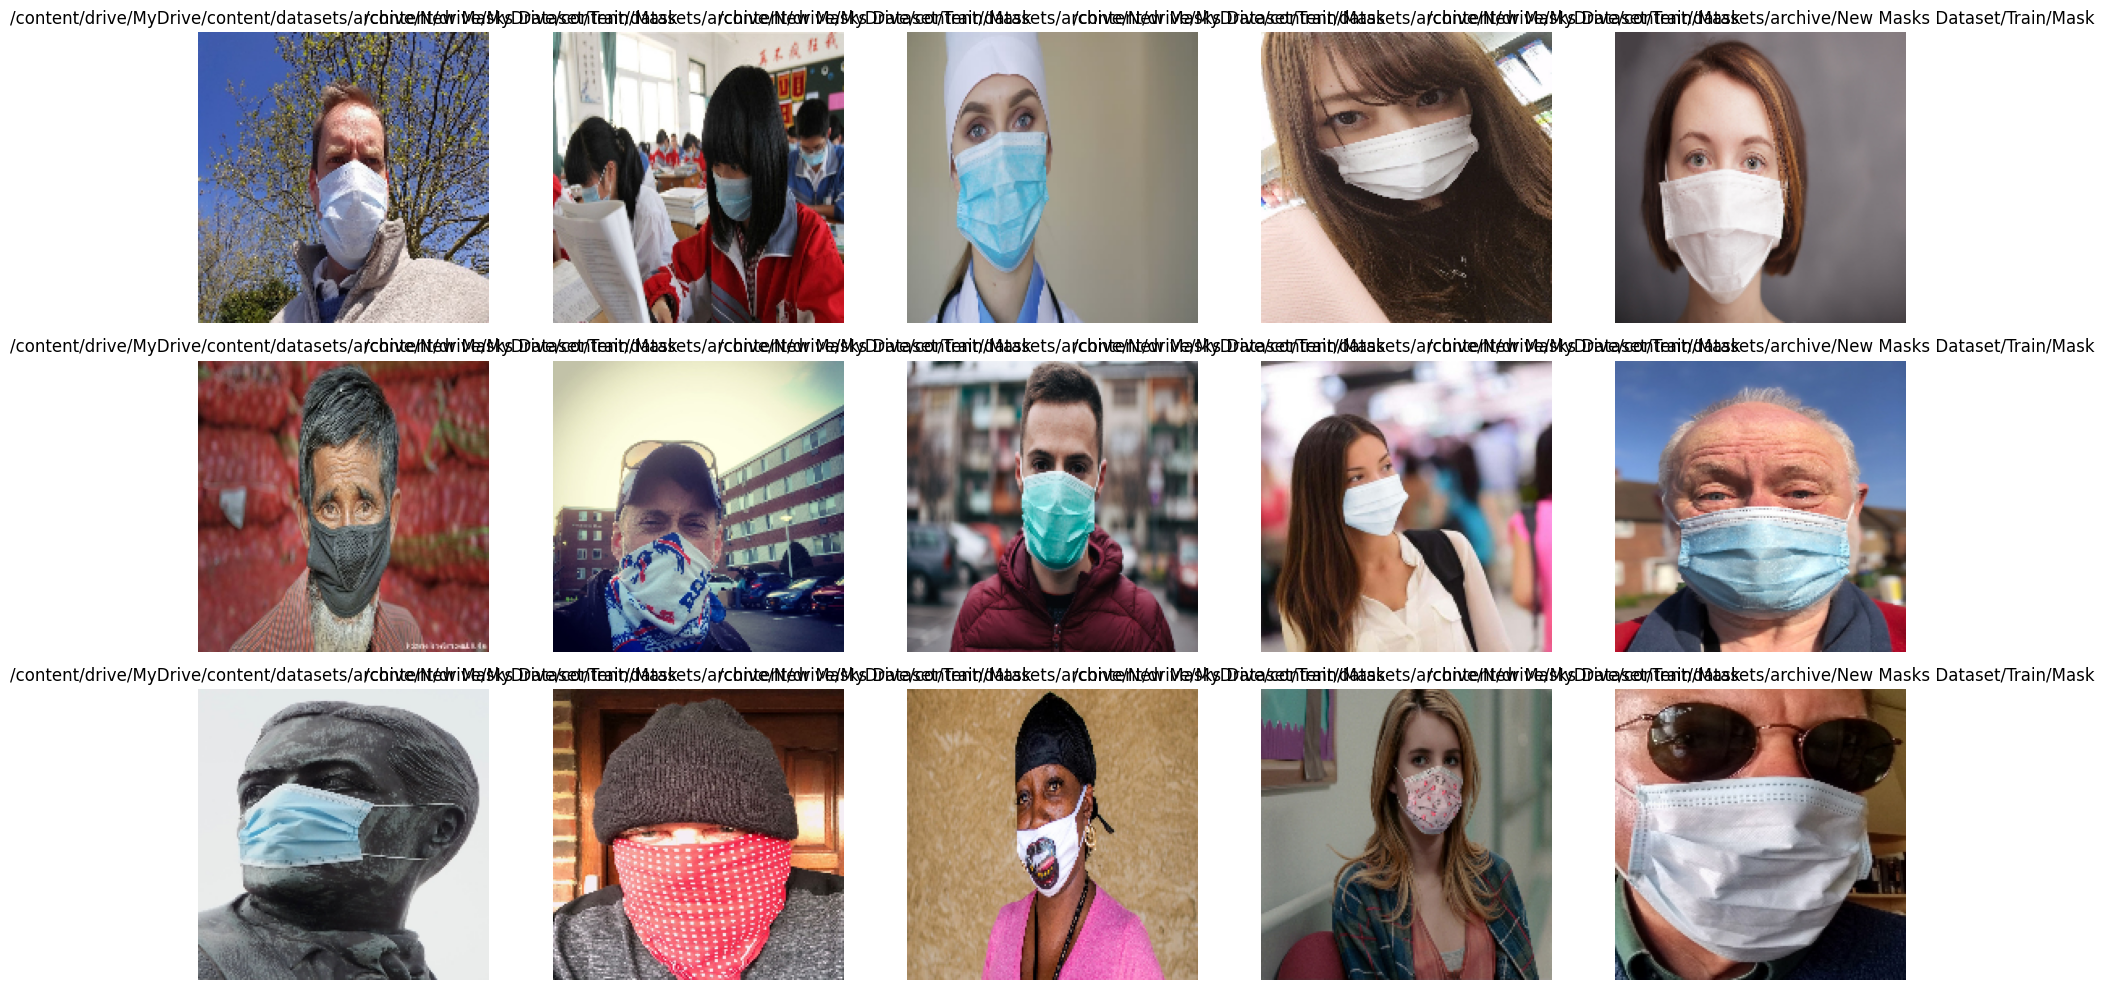

In [ ]:
view_images(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/Mask", num_images=15, rows=3, cols=5, target_size=180)

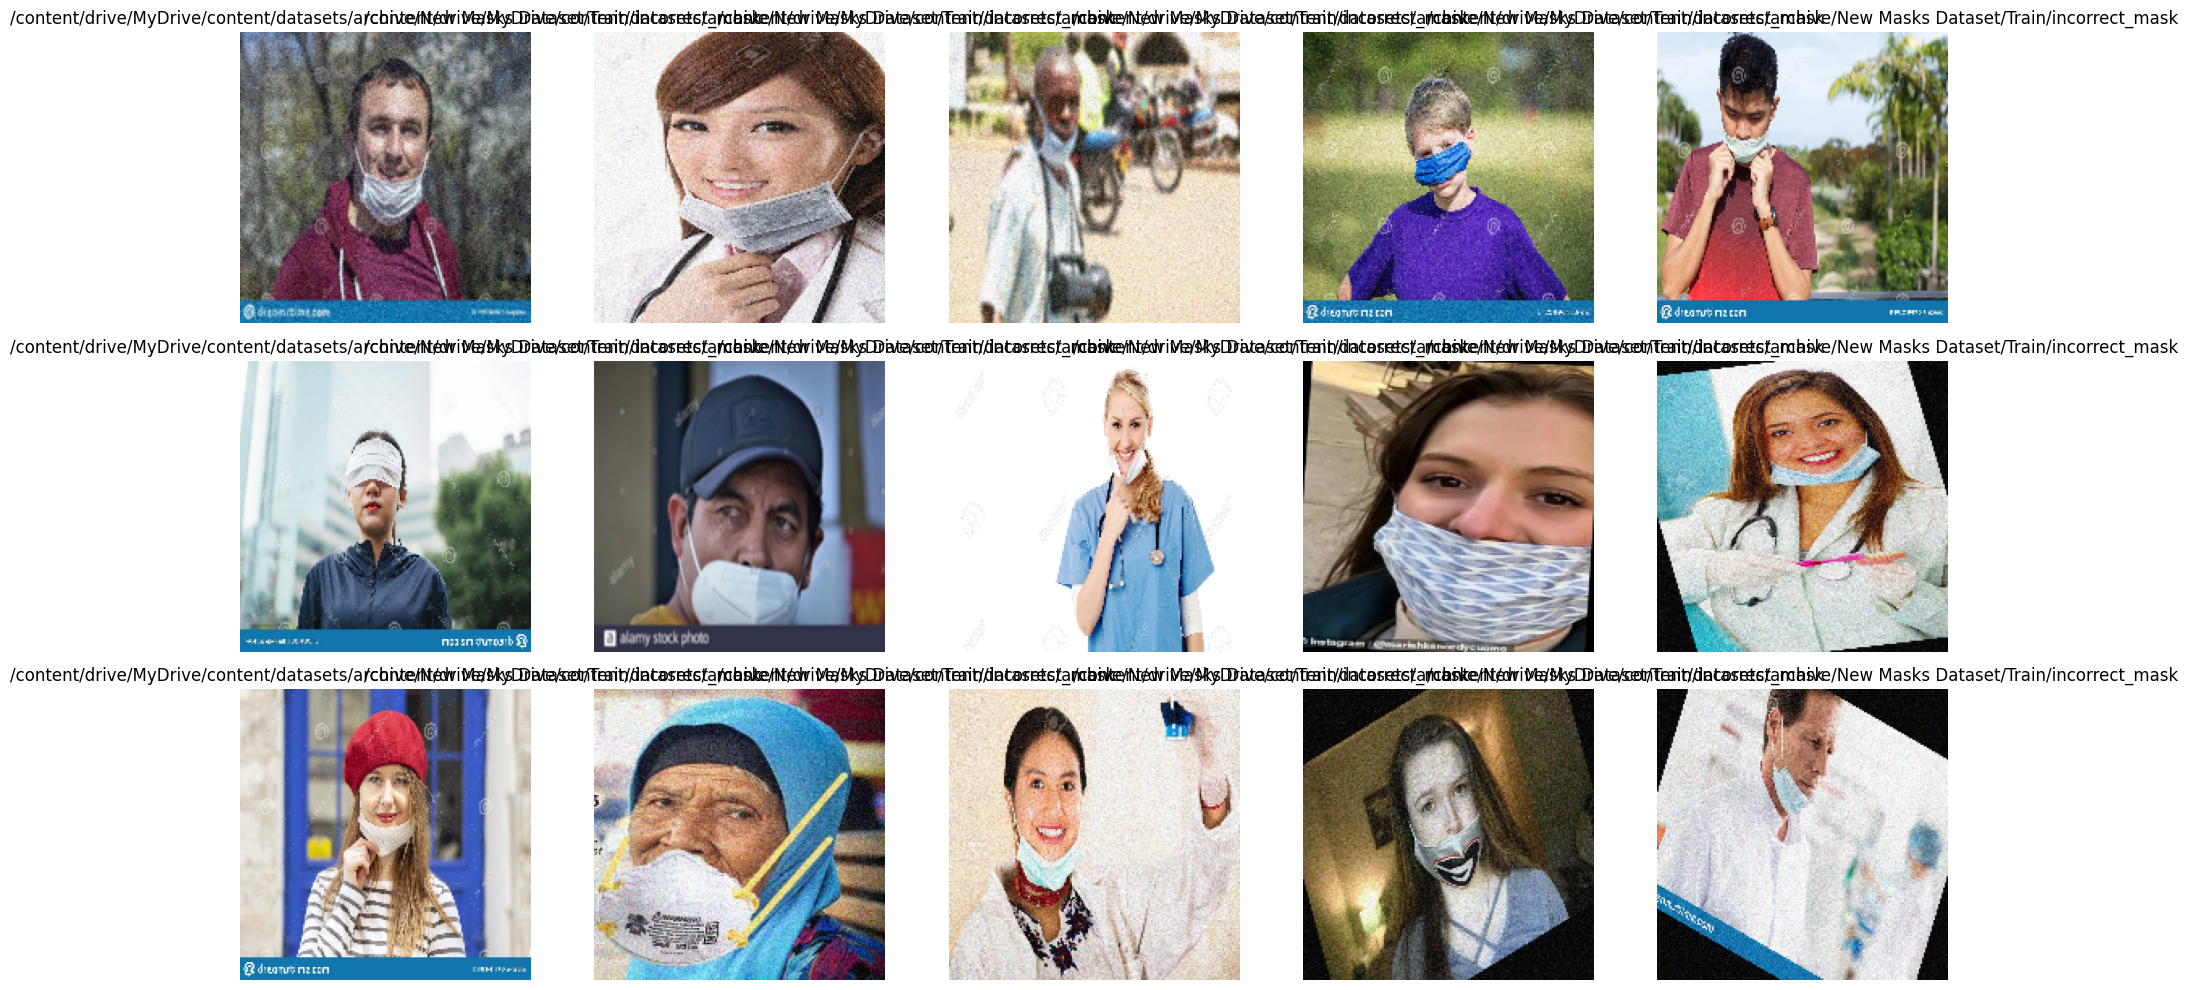

In [ ]:
view_images(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/incorrect_mask", num_images=15, rows=3, cols=5, target_size=180)

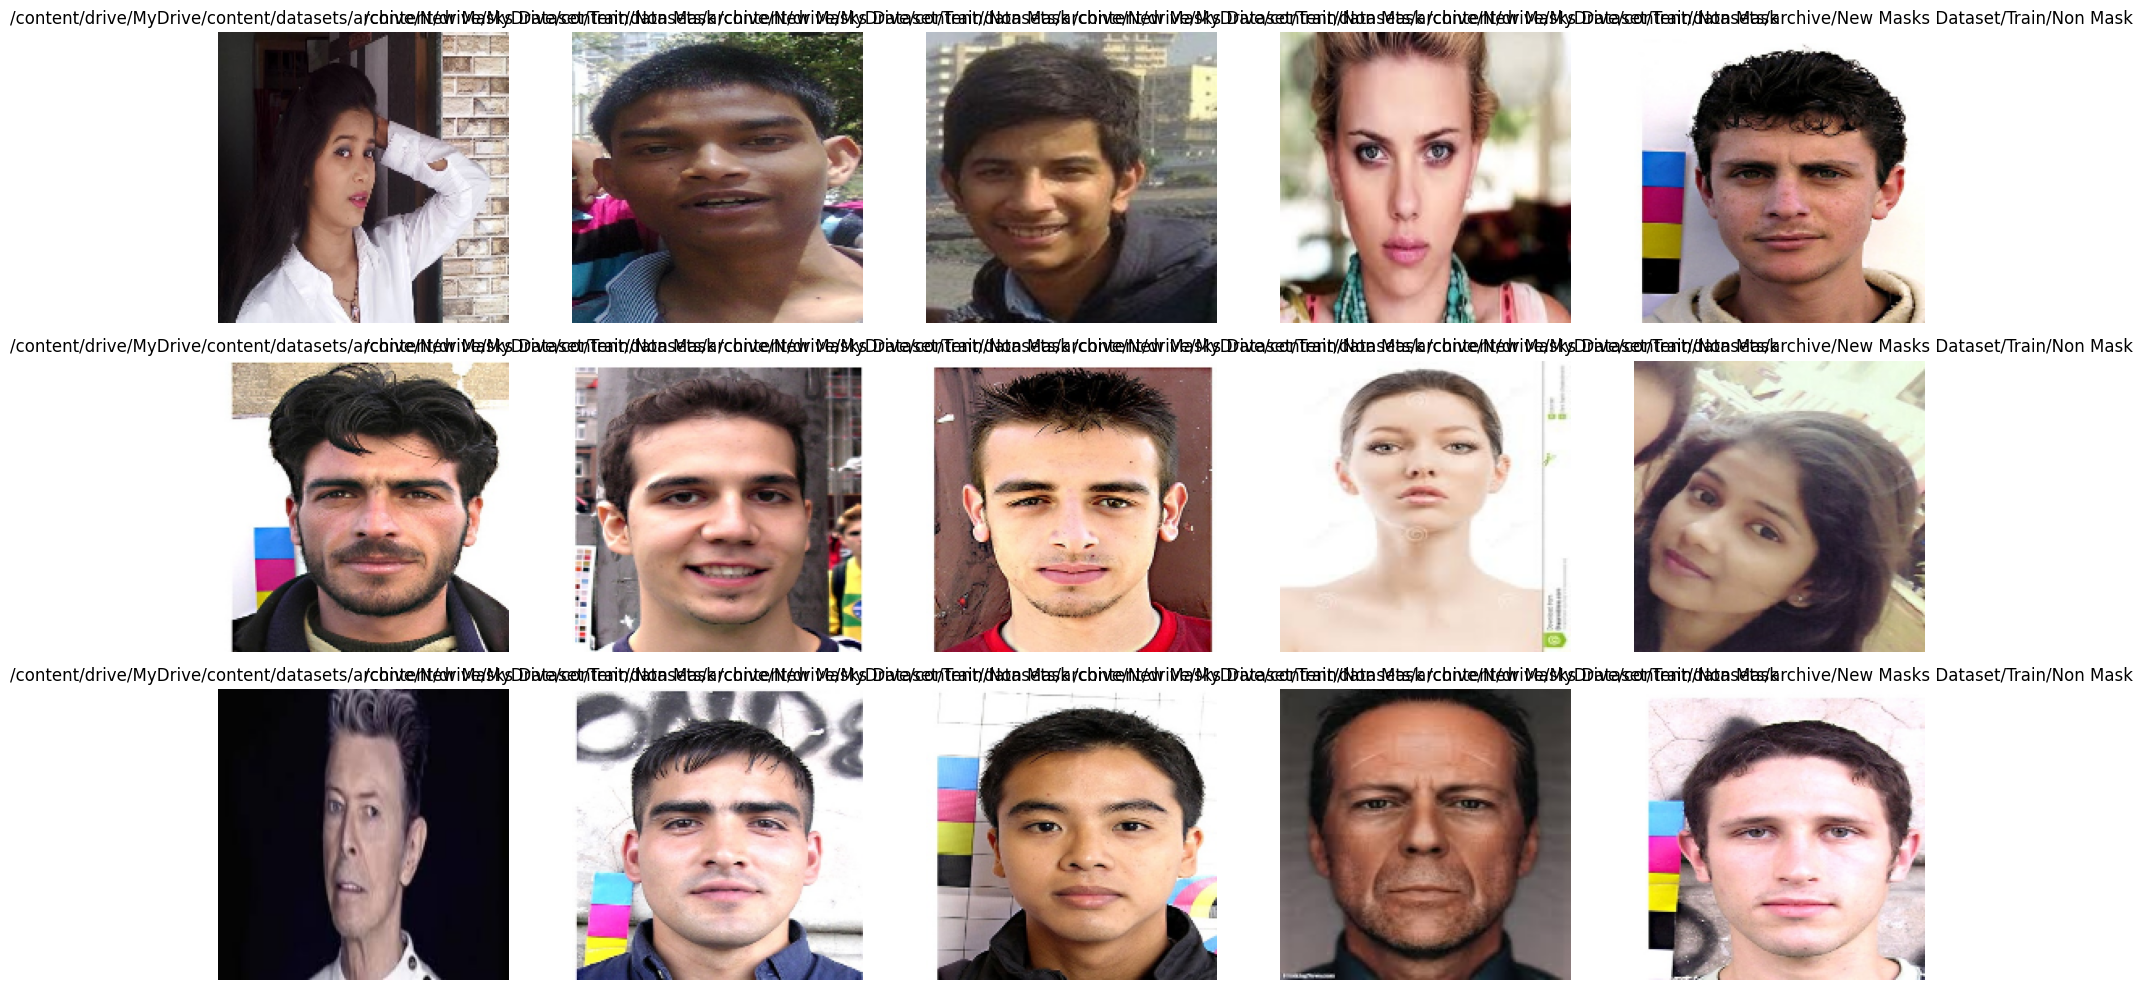

In [ ]:
view_images(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/Non Mask", num_images=15, rows=3, cols=5, target_size=180)

In [ ]:
import os
import cv2
import random
import numpy as np

train_data = []
train_labels = []

with_mask_dir = os.path.join(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/Mask")
incorrect_mask_dir = os.path.join(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/incorrect_mask")
without_mask_dir = os.path.join(train_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Train/Non Mask")



for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(1)


for a in os.listdir(incorrect_mask_dir):
    image = cv2.imread(os.path.join(incorrect_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(2)


for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(0)

In [ ]:
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)

print(f"Train Data Shape\t: {train_data.shape}")
print(f"Train Label Shape\t: {train_labels.shape}")

Train Data Shape	: (976, 224, 224, 3)
Train Label Shape	: (976,)


In [ ]:
test_data = []
test_labels = []

with_mask_dir = os.path.join(test_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Test/Mask")
incorrect_mask_dir = os.path.join(test_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Test/incorrect_mask")
without_mask_dir = os.path.join(test_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Test/Non Mask")




for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(1)

for a in os.listdir(incorrect_mask_dir):
    image = cv2.imread(os.path.join(incorrect_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(2)

for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(0)

In [ ]:
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

print(f"Test Data Shape \t: {test_data.shape}")
print(f"Test Label Shape\t: {test_labels.shape}")

Test Data Shape 	: (476, 224, 224, 3)
Test Label Shape	: (476,)


In [ ]:
val_data = []
val_labels = []

with_mask_dir = os.path.join(val_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Validation/Mask")
incorrect_mask_dir = os.path.join(val_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Validation/incorrect_mask")
without_mask_dir = os.path.join(val_dir, "/content/drive/MyDrive/content/datasets/archive/New Masks Dataset/Validation/Non Mask")

for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    val_data.append(image)
    val_labels.append(1)

for a in os.listdir(incorrect_mask_dir):
    image = cv2.imread(os.path.join(incorrect_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    val_data.append(image)
    val_labels.append(2)

for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    val_data.append(image)
    val_labels.append(0)

In [ ]:
val_data = np.array(val_data) / 255.0
val_labels = np.array(val_labels)

print(f"Validation Data Shape \t: {val_data.shape}")
print(f"Validation Label Shape\t: {val_labels.shape}")

Validation Data Shape 	: (682, 224, 224, 3)
Validation Label Shape	: (682,)


In [ ]:
X_train, y_train = (train_data, train_labels)
X_test, y_test = (test_data, test_labels)
X_val, y_val = (val_data, val_labels)

In [ ]:
num_classes = 3

base_model = tf.keras.applications.MobileNet(
    input_shape = [224,224,3],
    weights = "imagenet",
    include_top = False
)

base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=256, activation="relu")(x)
x = Dense(units=64, activation="relu")(x)

prediction_layer = Dense(units=num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
adam_lr = 0.00001
beta1 = 0.99
beta2 = 0.99
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

model.compile(
    optimizer = optimizer_adam,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
h_mobileNet = model.fit(
    X_train, y_train,
    epochs = 5,
    validation_data = (X_val, y_val),
    batch_size = 32
)

Epoch 1/5
31/31 [==============================] - 101s 3s/step - loss: 1.0569 - accuracy: 0.5953 - val_loss: 0.3386 - val_accuracy: 0.8842
Epoch 2/5
31/31 [==============================] - 92s 3s/step - loss: 0.1852 - accuracy: 0.9447 - val_loss: 0.1632 - val_accuracy: 0.9370
Epoch 3/5
31/31 [==============================] - 91s 3s/step - loss: 0.0571 - accuracy: 0.9857 - val_loss: 0.0547 - val_accuracy: 0.9839
Epoch 4/5
31/31 [==============================] - 96s 3s/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0356 - val_accuracy: 0.9927
Epoch 5/5
31/31 [==============================] - 92s 3s/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0322 - val_accuracy: 0.9912


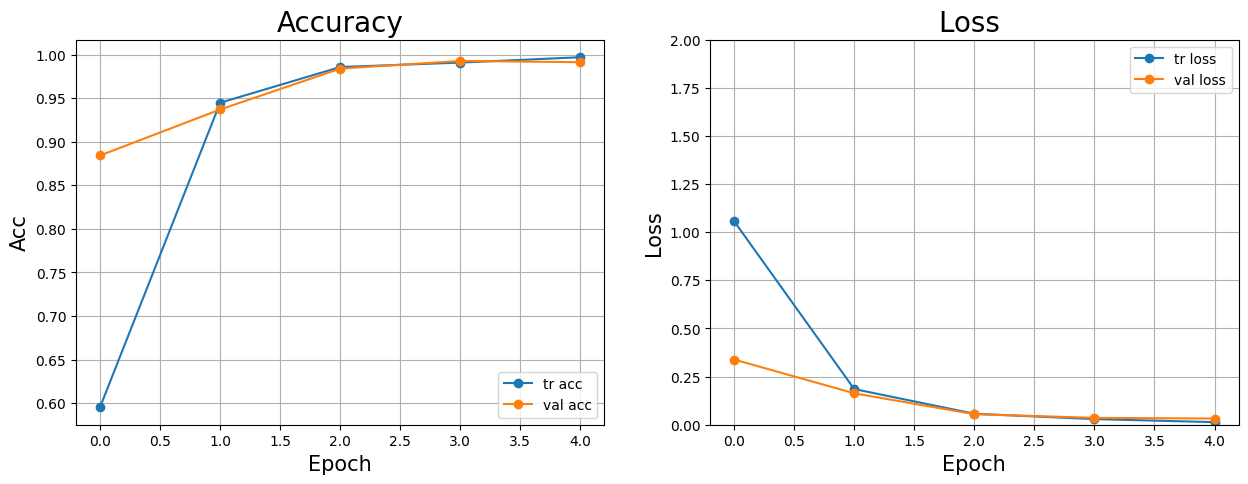

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Accuracy", size=20)
plt.plot(h_mobileNet.history['accuracy'], 'o-', label='tr acc')
plt.plot(h_mobileNet.history['val_accuracy'], 'o-', label = 'val acc')
plt.xlabel('Epoch', size=15)
plt.ylabel('Acc', size=15)
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.title("Loss ", size=20)
plt.plot(h_mobileNet.history['loss'], 'o-', label='tr loss')
plt.plot(h_mobileNet.history['val_loss'], 'o-', label='val loss')
plt.xlabel('Epoch', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, 2])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()